# **QUESTIONS**

**Question 1:** What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

 - Deep Learning is a subset of Machine Learning that uses multi-layer neural networks to automatically learn patterns and features from data, especially from complex inputs like images, text, and audio.

 **How it evolved?**

- 1950s: Perceptron introduced

- 1980s: Backpropagation developed

- 2010s: Rise of big data + GPUs → Deep Learning boom

 - Today: Used in vision, speech, NLP, and self-driving cars

 | Traditional ML                   | Deep Learning                         |
| -------------------------------- | ------------------------------------- |
| Needs manual feature engineering | Learns features automatically         |
| Works well on small datasets     | Needs large datasets                  |
| Can run on CPU                   | Requires GPU/TPU                      |
| Limited on complex tasks         | Excels on complex tasks (images, NLP) |

---

**Question 2:**  Explain the basic architecture and functioning of a Perceptron. What are its limitations?

 - **Perceptron Architecture**

A Perceptron is the simplest neural network unit. It has:

1. Inputs (x₁, x₂, …, xₙ)

2. Weights (w₁, w₂, …, wₙ)

3. Bias (b)

4. Summation function → computes weighted sum:

   z = w₁x₁ + w₂x₂ + … + b

5. Activation function (usually step function) → outputs 0 or 1

- **How a Perceptron Works**

1. Takes input values

2. Multiplies each input with its weight

3. Adds bias

4. Applies activation function

5. Produces output (decision: 0 or 1)

If z ≥ threshold → output = 1, else 0.

- **Limitations of Perceptron**

1. Can only solve linearly separable problems

(cannot solve XOR problem)

2. Uses a simple step activation, so no smooth learning

3. Cannot learn complex patterns (only binary classification)

4. Limited to a single layer, so very low representation power
---

**Question 3:** Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

 - **Purpose of Activation Function**

Activation functions introduce non-linearity into a neural network.
Without them, the network behaves like a simple linear model and cannot learn complex patterns (e.g., images, speech, text).
They help the model learn non-linear relationships and decide whether a neuron should activate or not.

 - **Comparison: Sigmoid vs ReLU vs Tanh**

 | Function    | Range   | Characteristics                                    | Advantages                                | Disadvantages                     |
| ----------- | ------- | -------------------------------------------------- | ----------------------------------------- | --------------------------------- |
| **Sigmoid** | 0 to 1  | S-shaped curve                                     | Good for probabilities                    | Vanishing gradient, slow training |
| **ReLU**    | 0 to ∞  | Outputs 0 for negative values, linear for positive | Fast training, reduces vanishing gradient | “Dying ReLU” (neurons stuck at 0) |
| **Tanh**    | –1 to 1 | S-shaped but zero-centered                         | Better than sigmoid for hidden layers     | Still suffers vanishing gradient  |

---


**Question 4:** What is the difference between Loss function and Cost function in neural networks? Provide examples.

**Loss Function**

**1.** Measures error for a single training example.

**2.** Tells how far the model's prediction is from the actual value for one sample.

**Examples:**

 - Mean Squared Error (for one sample)

 - Cross-Entropy Loss (per sample)

**Cost Function**

**1.** Measures average loss over the entire training dataset.

**2.** It is the overall error the model tries to minimize.

**Examples:**

- Mean Squared Error (average over all samples)

- Average Cross-Entropy (over all data points)
---

**Question 5:** What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

 - **Role of Optimizers in Neural Networks**

Optimizers are algorithms that update the model’s weights to minimize the loss function. They decide how fast and in which direction the weights should change during training. Good optimizers → faster training + better accuracy.

**Comparison: Gradient Descent vs Adam vs RMSprop**

| Optimizer                 | How it Works                                                         | Advantages                                      | Disadvantages                                                |
| ------------------------- | -------------------------------------------------------------------- | ----------------------------------------------- | ------------------------------------------------------------ |
| **Gradient Descent (GD)** | Updates weights using the **slope of loss**.                         | Simple, stable                                  | Slow, gets stuck in local minima, sensitive to learning rate |
| **RMSprop**               | Uses **moving average of squared gradients** → adapts learning rate. | Good for non-stationary data; faster than GD    | Still sensitive to tuning                                    |
| **Adam**                  | Combines **Momentum + RMSprop**                                      | Fastest, best default choice, adaptive learning | Can sometimes overfit or overshoot                           |

---

**Question 6:**  Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.


In [1]:
import numpy as np

# AND gate dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
lr = 0.1  # learning rate
epochs = 20

# Activation (step function)
def activation(z):
    return 1 if z >= 0 else 0

# Training loop
for _ in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = activation(z)
        error = y[i] - pred

        # update rule
        weights += lr * error * X[i]
        bias += lr * error

# Testing perceptron
outputs = []
for sample in X:
    z = np.dot(sample, weights) + bias
    outputs.append(activation(z))

weights, bias, outputs


(array([0.2, 0.1]), np.float64(-0.20000000000000004), [0, 0, 0, 1])

**Question 7:** Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

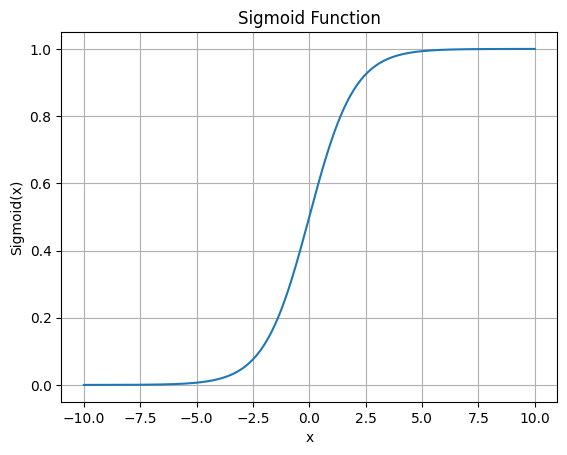

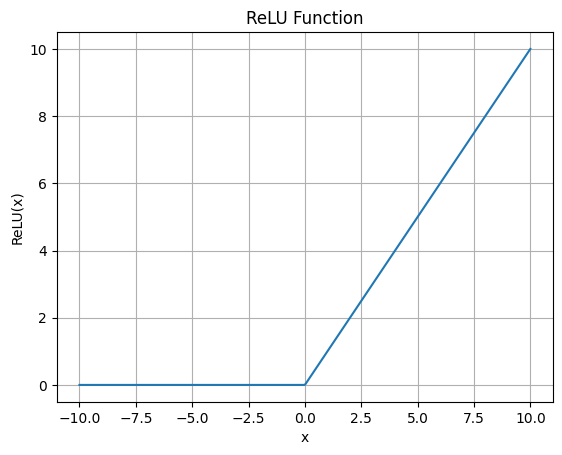

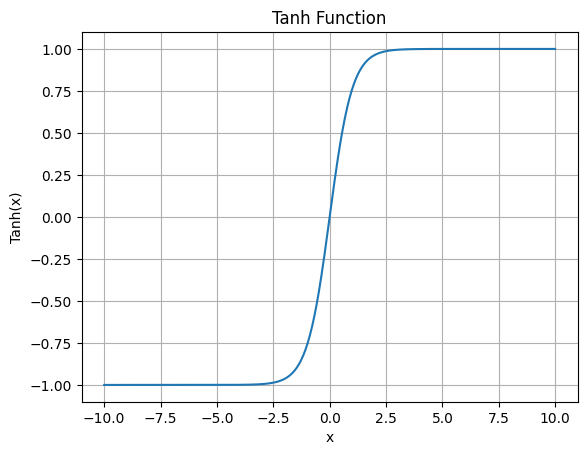

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Activation functions
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

# Plot Sigmoid
plt.figure()
plt.plot(x, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.show()

# Plot ReLU
plt.figure()
plt.plot(x, relu)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

# Plot Tanh
plt.figure()
plt.plot(x, tanh)
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("Tanh(x)")
plt.grid(True)
plt.show()


**Question 8:**  Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten 28x28 images
    Dense(128, activation='relu'),      # Hidden layer
    Dense(10, activation='softmax')     # Output layer (10 classes)
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Print training accuracy
print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8782 - loss: 0.4237
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9652 - loss: 0.1170
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9767 - loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0559
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9859 - loss: 0.0445
Training Accuracy: 0.986466646194458


**Question 9:** Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7657 - loss: 0.6731 - val_accuracy: 0.8369 - val_loss: 0.4438
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8606 - loss: 0.3869 - val_accuracy: 0.8640 - val_loss: 0.3819
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8748 - loss: 0.3413 - val_accuracy: 0.8739 - val_loss: 0.3488
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8858 - loss: 0.3072 - val_accuracy: 0.8670 - val_loss: 0.3712
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8896 - loss: 0.2935 - val_accuracy: 0.8802 - val_loss: 0.3268
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8947 - loss: 0.2833 - val_accuracy: 0.8850 - val_loss: 0.3178
Epoch 7/10
1500/1500 ━━━━━━━━━━━

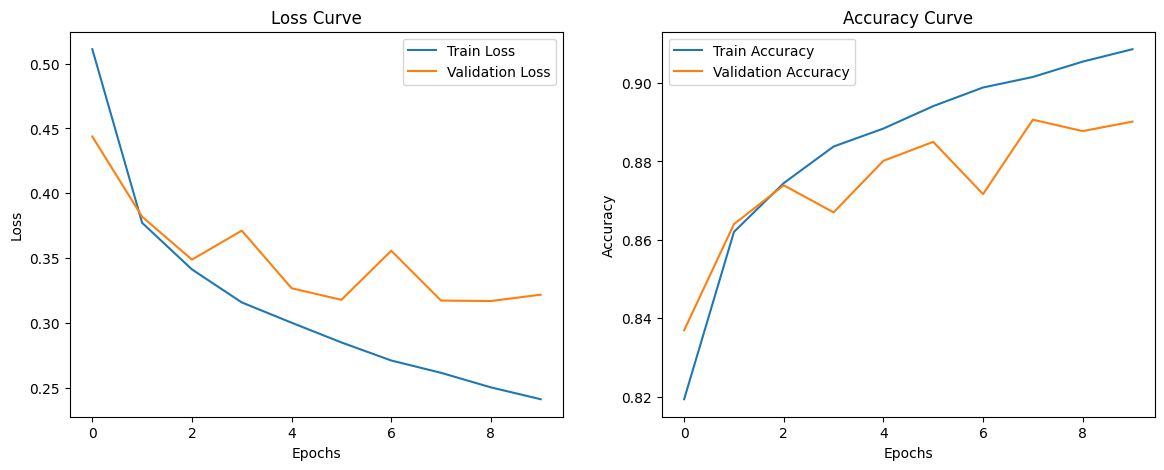

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Fashion MNIST dataset
# ------------------------------
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


# ------------------------------
# 2. Build a simple neural network
# ------------------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# ------------------------------
# 3. Train the model
# ------------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ------------------------------
# 4. Plot Loss & Accuracy curves
# ------------------------------
plt.figure(figsize=(14,5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


**Question 10:** You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:

-  How would you design a deep learning model (perceptron or multilayer NN)?
-  Which activation function and loss function would you use, and why?
-  How would you train and evaluate the model, considering class imbalance?
-  Which optimizer would be suitable, and how would you prevent overfitting?
(Include your Python code and output in the code box below.)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight

# --------------------------------------
# Dummy example dataset for demonstration
# Replace X, y with real fraud dataset
# --------------------------------------
np.random.seed(42)
X = np.random.rand(5000, 20)        # 20 features
y = np.random.choice([0,1], size=5000, p=[0.97, 0.03])   # Imitating imbalance

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights (important for imbalance)
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: weights[0], 1: weights[1]}
print("Class Weights:", class_weights)

# --------------------------------------
# Build Neural Network
# --------------------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --------------------------------------
# Training with Early Stopping + Class Weights
# --------------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# --------------------------------------
# Evaluation
# --------------------------------------
pred_probs = model.predict(X_test)
pred_labels = (pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, pred_labels))

print("ROC-AUC Score:", roc_auc_score(y_test, pred_probs))


Class Weights: {0: np.float64(0.5145356315924878), 1: np.float64(17.699115044247787)}
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8208 - loss: 0.7045 - val_accuracy: 0.3587 - val_loss: 0.7133
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4751 - loss: 0.7134 - val_accuracy: 0.2900 - val_loss: 0.7358
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4257 - loss: 0.7467 - val_accuracy: 0.6000 - val_loss: 0.6682
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4486 - loss: 0.7542 - val_accuracy: 0.8600 - val_loss: 0.6031
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5847 - loss: 0.7088 - val_accuracy: 0.4087 - val_loss: 0.7120
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4308 - loss: 0.7523 - val_accuracy: 0.8950 - val_loss: 0.5386
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6648 - loss: 0.7103 - val_accuracy: 0.7300 - val_loss: 0.6185
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5854 - loss: 0.6885 - val_accuracy: 0.4225 - val